In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
rc = ipp.Cluster(n=2).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 2 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/2 [00:00<?, ?engine/s]

In [ ]:
learning_rates = [0.1]

dfca_gi = []
ifca = []

In [ ]:
%%px --targets all

import sys
import os
import random
sys.path.append(os.getcwd())

random.seed(42)
seeds = random.sample(range(10000), 5)
learning_rates = [0.1]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [5]:
%%px --target 0 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_gi.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



<AsyncResult(%px): pending>

Running the ifca experiment

In [6]:
%%px --target 1 --noblock
import ifca as IFCA
import json
import time
import torch
import numpy as np

with open("config_ifca.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------IFCA, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



<AsyncResult(%px): pending>

## Results

DFCA-GI Experiment Outputs

In [7]:
rc.wait_interactive()
_.display_outputs()

dfca_gi = rc[0].pull('dfca_gi', block=True)
ifca = rc[1].pull('ifca', block=True)

unknown:   0%|          | 0/2 [00:00<?, ?tasks/s]

---------------------------------IFCA, lr: 0.1, seed: 111---------------------------------
config: {'m': 2400, 'm_test': 400, 'p': 4, 'n': 100, 'uneven': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 111, 'train_seed': 111, 'config_override': '', 'project_dir': 'output_ifca'}
Using device: cuda
Failed to download (trying next):
HTTP Error 404: Not Found

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch -1 tr: l 2.292 a 0.117 clct[462, 1163, 318, 457] cl_acc 0.438  13.559sec
Epoch -1 tst: l 2.291 a 0.116 clct[

100%|██████████| 9.91M/9.91M [00:01<00:00, 9.21MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 256kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.49MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.84MB/s]


IFCA Experiment Outputs

In [8]:
__.display_outputs()

---------------------------------DFCA-GI, lr: 0.1, seed: 111---------------------------------
config: {'m': 2400, 'm_test': 400, 'p': 4, 'n': 100, 'uneven': True, 'local_model_init': False, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 111, 'train_seed': 111, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
Failed to download (trying next):
HTTP Error 404: Not Found

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch -1 tr: l 2.292 a 0.117 clct[462, 1163, 318, 457] cl_acc 0.438  13.944sec
Ep

100%|██████████| 9.91M/9.91M [00:01<00:00, 9.66MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 257kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.8MB/s]


IFCA Experiment Outputs

## Plots

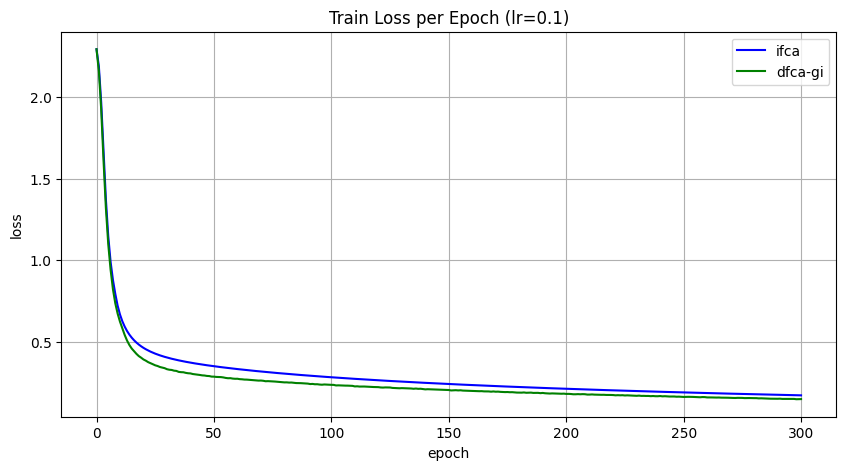

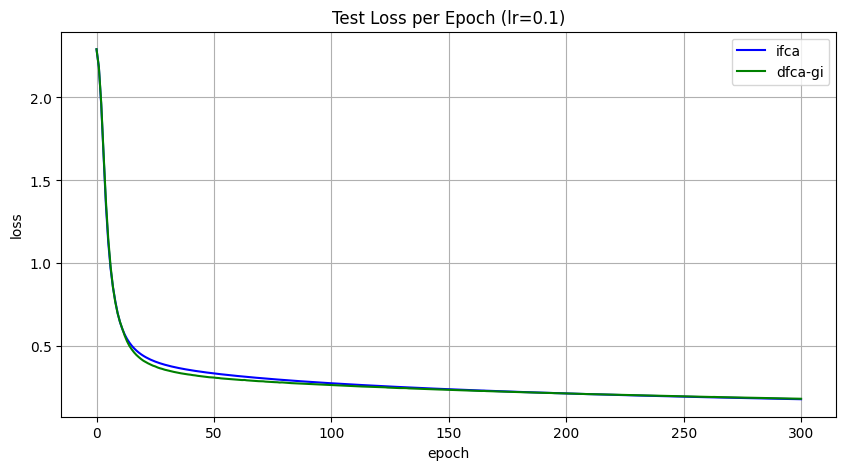

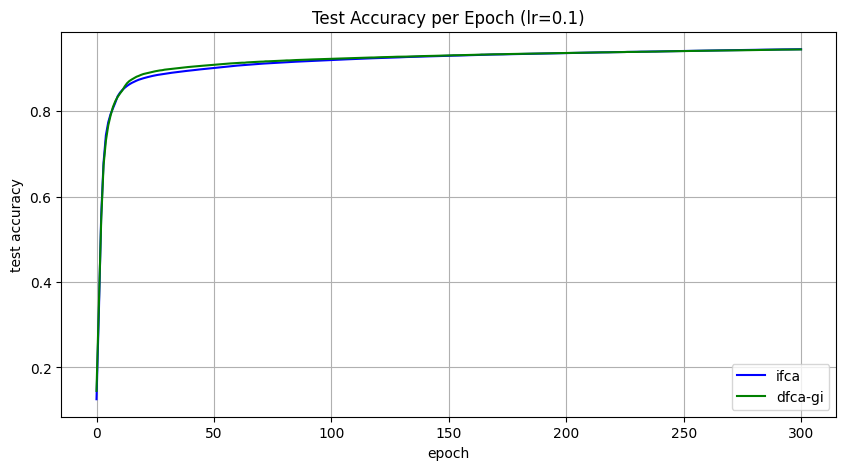

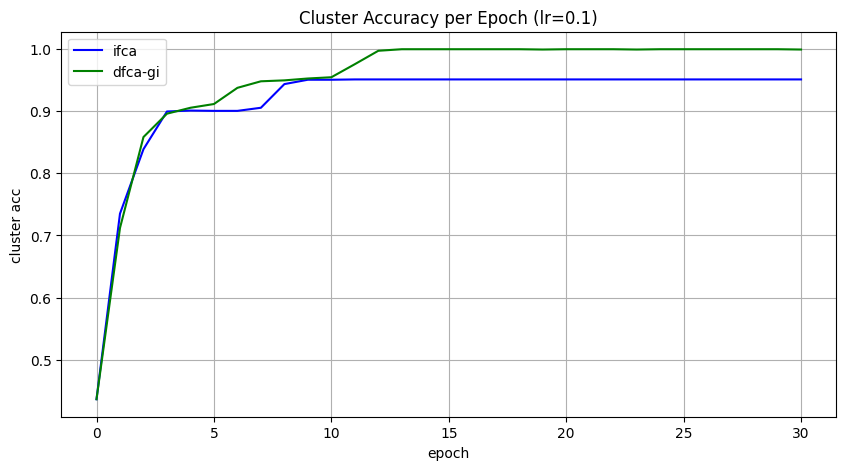

In [9]:

r_ifca = {}
r_dfca_gi = {}

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
r_ifca['train_loss'] = []
for i in range(len(learning_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])
    r_ifca['train_loss'].append(ifca[i][3])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])



os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['train_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['cl_acc'][l][:31], label='ifca', color='blue')
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('cluster acc')
    plt.title(f'Cluster Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_cluster_acc.png'))